In [102]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

import Regression

from importlib import reload
reload(Regression)
#reload(Optimisation)
from Regression import *

from matplotlib.animation import FuncAnimation




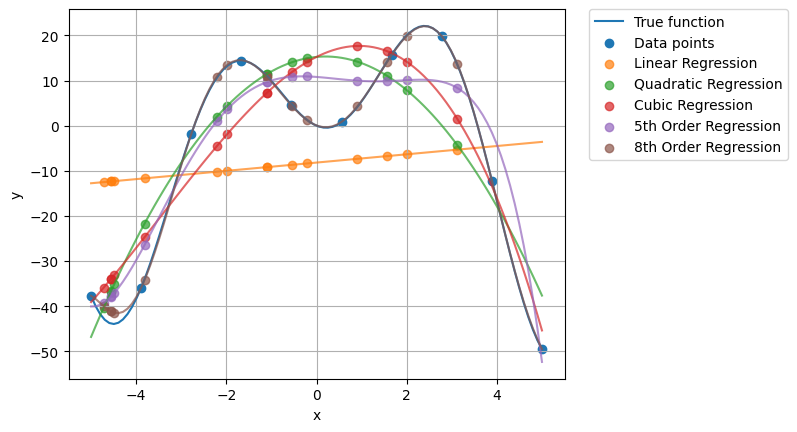

In [103]:
def non_trivial_function(x):
    return 10*np.cos(x - 2) * x

x_min = -5
x_max = 5

xs = np.linspace(x_min, x_max, 10).astype(float)
ys = non_trivial_function(xs)

xs_linspace = np.linspace(x_min, x_max, 100)


fig, ax = plt.subplots()
ax.plot(xs_linspace, non_trivial_function(xs_linspace), label='True function')
ax.scatter(xs, ys, label='Data points')

x_samples = np.random.uniform(x_min, x_max, 15)

orders = [1, 2, 3, 5, 8]
colors = ['C1', 'C2', 'C3', 'C4', 'C5']
for order, color in zip(orders, colors):
    PR = PolynomialRegression(xs, ys, order = order, x_range = [x_min, x_max])
    PR.plot(ax, x_samples=x_samples, solid_line=True, color=color, alpha = 0.7)



ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

def update(i):
    ax.clear()
    ax.plot(xs_linspace, non_trivial_function(xs_linspace), label='True function')
    ax.scatter(xs, ys, label='Data points')
    idx = i
    PR = PolynomialRegression(xs, ys, order = idx, x_range = [x_min, x_max])
    PR.plot(ax, x_samples=x_samples, solid_line=True, color=f'C{idx}', alpha = 0.7)
    ax.legend(loc='upper left', borderaxespad=0.)
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set(xlim=(-2, 12), ylim=(-60, 80))

#ani = FuncAnimation(fig, update, frames=np.arange(0, 20), repeat=False)
#ani.save('Figures/polynomial_regression.gif', writer='imagemagick', fps=1.5)

In [109]:
#Check that the matrix is invertible
PR = PolynomialRegression(xs, ys, order = 10, x_range = [0, 9])

result = np.linalg.inv(PR.X.T @ PR.X) @ (PR.X.T @ PR.X)

#print(result.round())

result

array([[ 1.00000000e+00,  7.59787253e-14, -5.90435588e-13,
         2.05600958e-12, -3.70028156e-11,  9.21161146e-11,
         3.59733141e-10,  1.02665539e-10,  3.64468104e-09,
        -1.35577265e-08,  1.98657736e-08],
       [ 3.89556388e-15,  1.00000000e+00,  1.06360386e-13,
        -6.53050388e-13, -5.13442277e-12,  1.39597362e-11,
         9.10887058e-11,  9.26024974e-11,  2.60169149e-10,
        -1.28963322e-09,  4.13687902e-09],
       [ 1.28059062e-15, -2.62862795e-15,  1.00000000e+00,
        -7.98987979e-14,  2.64357508e-12, -5.58015965e-12,
        -2.73837724e-11, -1.61091413e-11, -2.38919752e-10,
         8.50744348e-10, -1.25477283e-09],
       [-1.26895126e-16,  1.43768471e-15, -4.02660694e-15,
         1.00000000e+00,  4.40506651e-13, -9.41338146e-13,
        -6.38626892e-12, -6.28071274e-12, -2.74986929e-11,
         1.21693111e-10, -2.73256275e-10],
       [ 9.55875182e-19, -4.77748187e-18,  1.97667775e-17,
        -1.21171770e-16,  1.00000000e+00,  9.94127317e-18,
  

[(-5.0, 5.0), (-20.0, 40.0)]

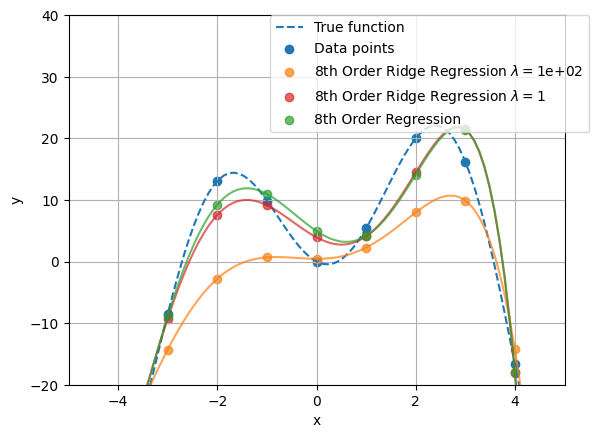

In [105]:
order = 8
xs = np.arange(x_min, x_max) 
ys = non_trivial_function(xs)
lmb = 1e2
xs_linspace = np.linspace(x_min, x_max, 100)
RR = RidgeRegression(xs, ys, order = order, lmb=1e2, x_range = [x_min, x_max])
PR = PolynomialRegression(xs, ys, order = order, x_range = [x_min, x_max])
RR2 = RidgeRegression(xs, ys, order = order, lmb=1e0, x_range = [x_min, x_max])

fig, ax = plt.subplots()

ax.plot(xs_linspace, non_trivial_function(xs_linspace), '--', label='True function')
ax.scatter(xs, ys, label='Data points')


RR.plot(ax, x_samples=xs, solid_line=True, color='C1', alpha = 0.7)
RR2.plot(x_samples=xs, ax = ax, solid_line=True, color='C3', alpha = 0.7)

PR.plot(ax, x_samples=xs, solid_line=True, color='C2', alpha = 0.7)

ax.legend(loc='upper right', borderaxespad=0.,bbox_to_anchor=(1.05, 1))
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set(xlim=(-5, 5), ylim=(-20, 40))



In [106]:
from sklearn.linear_model import Ridge
n_samples, n_feaurtes = 10, 5

xs_sk = np.random.uniform(0, 10, n_samples)
ys_sk = non_trivial_function(xs) + np.random.normal(0, 1, n_samples)
RR = RidgeRegression(xs, ys, order = 6)

RR.regression()

clf = Ridge(alpha=100)
clf.fit(RR.X, ys)
print(clf.coef_)
print(RR.betas)

[ 0.         -0.0019454   0.47640668  0.80861718 -0.20203451 -0.04172745
  0.00227456]
[ 1.56933042 -0.75854807  3.94245887  1.00618391 -0.49304342 -0.05026045
  0.00861936]


# Data with Noise

[(-5.0, 5.0), (-20.0, 40.0)]

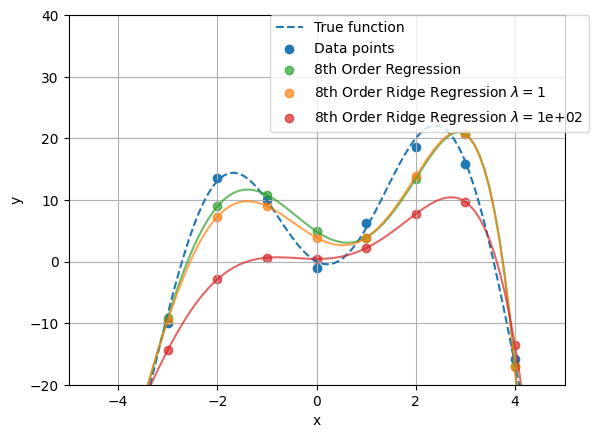

In [107]:
sigma = 1
ys_noised = ys + np.random.normal(0, sigma**2, n_samples)

PR = PolynomialRegression(xs, ys_noised, order = 8, x_range = [x_min, x_max])
RR = RidgeRegression(xs, ys_noised, order = 8, lmb=1e0, x_range = [x_min, x_max])
RR2 = RidgeRegression(xs, ys_noised, order = 8, lmb=1e2, x_range = [x_min, x_max])

fig, ax = plt.subplots()

#Plot the true function and the data points
ax.plot(xs_linspace, non_trivial_function(xs_linspace),'--', label='True function')
ax.scatter(xs, ys_noised, label='Data points')

#Plot the polynomial regression
PR.plot(ax, x_samples=xs, solid_line=True, color='C2', alpha = 0.7)
RR.plot(ax, x_samples=xs, solid_line=True, color='C1', alpha = 0.7)
RR2.plot(ax, x_samples=xs, solid_line=True, color='C3', alpha = 0.7)


ax.legend(loc='upper right', borderaxespad=0.,bbox_to_anchor=(1.05, 1))
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set(xlim=(-5, 5), ylim=(-20, 40))
